# Consulta de Datossobre una API Protegida

Trabajamos para monitorear las **condiciones meteorológicas** en tiempo real en Canarias para optimizar la eficiencia de un sistema de **energía solar**. Necesitas acceder a una API meteorológica que proporciona datos sobre **temperatura**, **humedad** y **radiación solar**. La API está protegida por una **API Key** que debes incluir en tus solicitudes.

## Objetivos del ejercicio
1. Realizar una **solicitud HTTP** a una API meteorológica protegida con **credenciales** (API Key).
2. Extraer datos sobre **temperatura**, **humedad**, y **radiación solar** para una **ubicación específica**.
3. Cargar los datos obtenidos en un **DataFrame de Pandas** para su análisis.
4. Generar visualizaciones para analizar las **correlaciones** entre las variables meteorológicas.

---

## Configuración previa

1. **Regístrate en un servicio meteorológico** (por ejemplo, **OpenWeatherMap** o **WeatherAPI**) y obtén tu **API Key**.
2. **Instala las librerías necesarias** (si no las tienes instaladas):

In [8]:
! pip install requests pandas matplotlib seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


---

##  Ejercicio: Consulta de datos sobre API con seguridad

### Realizar la solicitud a la API

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros para la consulta
API_KEY = 'YOUR_API_KEY'  # Reemplaza con tu API Key
CIUDAD = 'Santa Cruz de Tenerife,ES'
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CIUDAD}&appid={API_KEY}&units=metric"

response = requests.get(URL)

# Comprobar si la solicitud fue exitosa
if response.status_code == 200:
    print("Conexión exitosa con la API.")
    datos = response.json()
else:
    print(f"Error al conectarse con la API. Código de respuesta: {response.status_code}")
    exit()

Conexión exitosa con la API.


### Extraer los datos relevantes y transformarlos en un DataFrame

In [10]:
fechas = []
temperaturas = []
humedades = []
radiacion_solar = []  # Supongamos que la radiación solar viene en el campo 'clouds'

for entry in datos['list']:
    fechas.append(entry['dt_txt'])
    temperaturas.append(entry['main']['temp'])
    humedades.append(entry['main']['humidity'])
    # Usamos el porcentaje de nubes como aproximación de la radiación solar inversamente proporcional
    radiacion_solar.append(100 - entry['clouds']['all'])

# Crear un DataFrame
df = pd.DataFrame({
    "Fecha": pd.to_datetime(fechas),
    "Temperatura (°C)": temperaturas,
    "Humedad (%)": humedades,
    "Radiación Solar (%)": radiacion_solar
})

df.set_index("Fecha", inplace=True)

# Mostrar las primeras filas del DataFrame
print("\nDatos extraídos:")
print(df.head())



Datos extraídos:
                     Temperatura (°C)  Humedad (%)  Radiación Solar (%)
Fecha                                                                  
2024-11-18 15:00:00             22.49           81                   60
2024-11-18 18:00:00             21.97           78                   72
2024-11-18 21:00:00             21.33           79                   85
2024-11-19 00:00:00             20.57           78                   86
2024-11-19 03:00:00             20.32           79                   26


### Visualización y análisis de datos

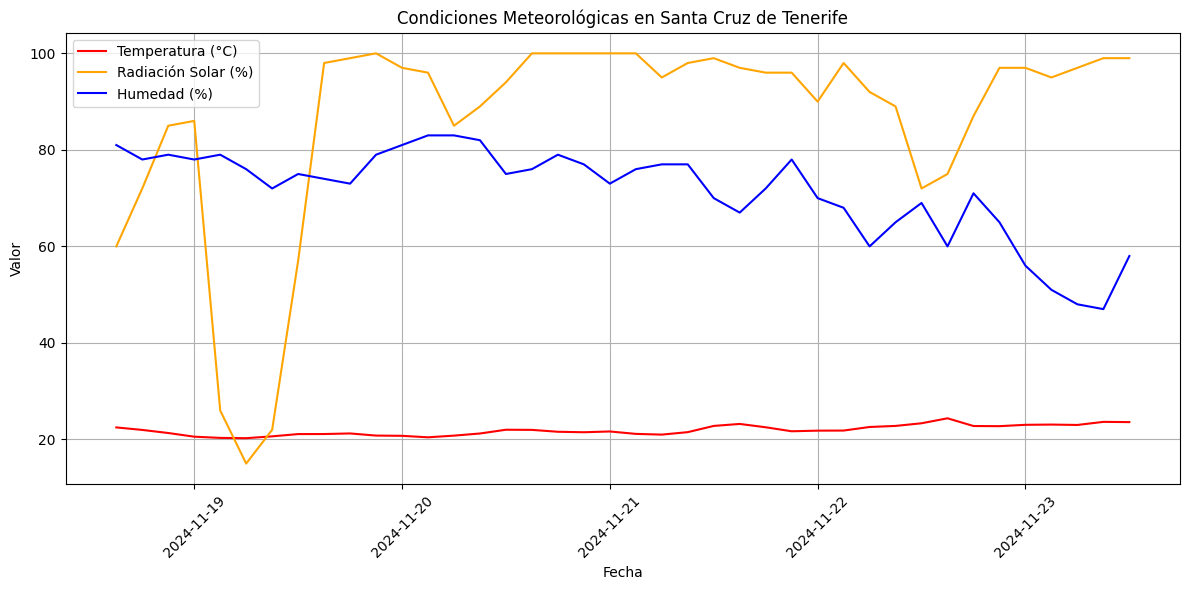

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Temperatura (°C)"], label="Temperatura (°C)", color='red')
plt.plot(df.index, df["Radiación Solar (%)"], label="Radiación Solar (%)", color='orange')
plt.plot(df.index, df["Humedad (%)"], label="Humedad (%)", color='blue')
plt.title("Condiciones Meteorológicas en Santa Cruz de Tenerife")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


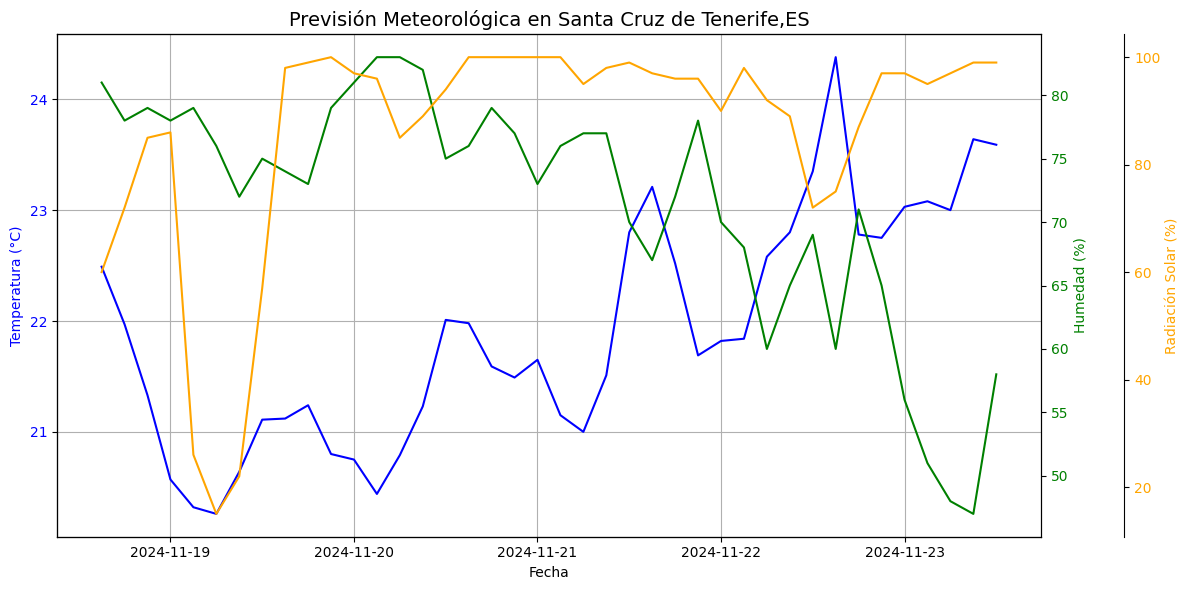

In [22]:
# Crear el gráfico principal con el primer eje Y (temperatura)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar la temperatura en el eje Y1
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Temperatura (°C)', color='blue')
ax1.plot(df.index, df['Temperatura (°C)'], color='blue', label='Temperatura (°C)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Crear un segundo eje Y que comparta el eje X (humedad relativa)
ax2 = ax1.twinx()  
ax2.set_ylabel('Humedad (%)', color='green')
ax2.plot(df.index, df['Humedad (%)'], color='green', label='Humedad (%)')
ax2.tick_params(axis='y', labelcolor='green')

# Crear un tecer eje Y que comparta el eje X (radiación solar)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje un poco a la derecha
ax3.set_ylabel('Radiación Solar (%)', color='orange')
ax3.plot(df.index, df['Radiación Solar (%)'], color='orange', label='Humedad (%)')
ax3.tick_params(axis='y', labelcolor='orange')

# Añadir el título del gráfico
plt.title('Previsión Meteorológica en {}'.format(CIUDAD), fontsize=14)

# Ajustar los márgenes
fig.tight_layout()

# Mostrar el gráfico
plt.show()


### Análisis de correlación


Matriz de Correlación:
                     Temperatura (°C)  Humedad (%)  Radiación Solar (%)
Temperatura (°C)             1.000000    -0.765285             0.317688
Humedad (%)                 -0.765285     1.000000            -0.192552
Radiación Solar (%)          0.317688    -0.192552             1.000000


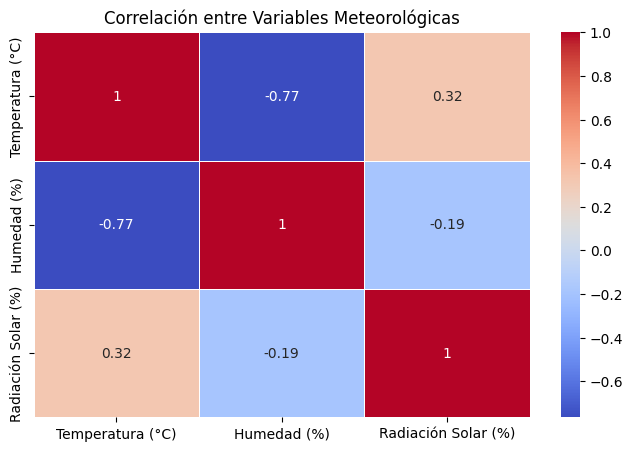

In [24]:
correlaciones = df.corr()
print("\nMatriz de Correlación:")
print(correlaciones)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 5))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación entre Variables Meteorológicas")
plt.show()


### Gráfico de dispersión entre Radiación Solar y Temperatura

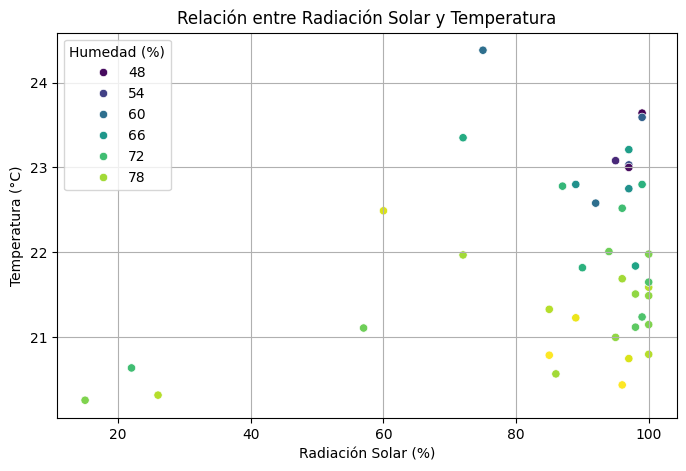

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Radiación Solar (%)", y="Temperatura (°C)", data=df, hue="Humedad (%)", palette="viridis")
plt.title("Relación entre Radiación Solar y Temperatura")
plt.xlabel("Radiación Solar (%)")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

## Explicación del Código

1. **Consulta a la API**:
   - Realizamos una solicitud HTTP GET a la API utilizando la API Key.
   - Validamos que la conexión sea exitosa antes de continuar.

2. **Extracción de datos**:
   - Extraemos las variables de **temperatura**, **humedad**, y una aproximación de la **radiación solar** a partir del porcentaje de nubes.

3. **Creación del DataFrame**:
   - Los datos se organizan en un **DataFrame de Pandas** para un análisis estructurado.

4. **Visualización**:
   - Utilizamos **Matplotlib** para graficar la evolución diaria de las variables.
   - Usamos **Seaborn** para un análisis de correlación y gráficos de dispersión.

5. **Correlaciones**:
   - El **mapa de calor** y los gráficos de dispersión ayudan a entender cómo la radiación solar y la temperatura están relacionadas con la generación de energía.
